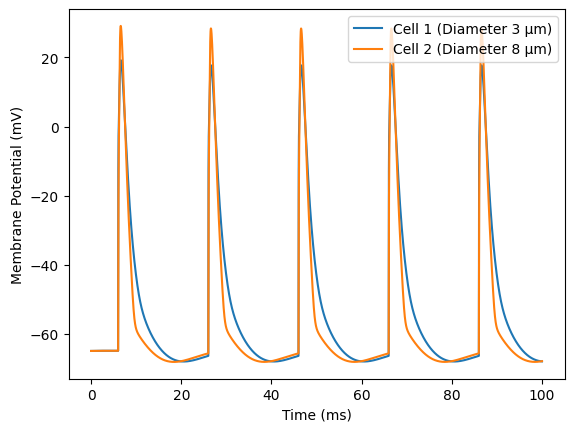

In [6]:
from neuron import h
import matplotlib.pyplot as plt

class BallAndStick:
    def __init__(self, gid):
        self._gid = gid  
        self.soma = h.Section(name=f"soma_{gid}")  
        self.soma.L = 20  
        self.soma.insert("hh") 

        self.v_soma = h.Vector().record(self.soma(0.5)._ref_v)

        self.syn = h.ExpSyn(self.soma(0.5))  
        self.syn.tau = 2  
        self.syn.e = 0  

    def __repr__(self):
        return f"BallAndStick[{self._gid}]"


cell1 = BallAndStick(1)
cell2 = BallAndStick(2)

cell1.soma.diam = 3  
cell2.soma.diam = 8  

stim = h.NetStim()
stim.number = 10  
stim.start = 5  
stim.interval = 20  
stim.noise = 0  

nc1 = h.NetCon(stim, cell1.syn)  
nc1.weight[0] = 0.1  

nc2 = h.NetCon(stim, cell2.syn)  
nc2.weight[0] = 0.1 

t = h.Vector().record(h._ref_t)

h.finitialize(-65)  
h.continuerun(100) 

# plot
plt.plot(t, cell1.v_soma, label="Cell 1 (Diameter 3 μm)")
plt.plot(t, cell2.v_soma, label="Cell 2 (Diameter 8 μm)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.show()
